<a href="https://colab.research.google.com/github/Poojakjain25/Flight_Price_Data_Cleaning_Feature_Engineering/blob/main/Flight_price_data_cleaning_feature_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment:**

Performing **Data Cleaning** and **Feature Engineering** on **'Flight Price Prediction'** Dataset

In [ ]:
# Importing required libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the dataset
df = pd.read_csv('economy.csv')
df.head() # Fetching Top-5 Data

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


Here, **PRICE** column is the **Target** Variable

In the dataset:

* **`ch_code`** (Carrier Code): This is the **airline's code**, usually a **two-letter** code assigned by IATA (International Air Transport Association).

  * Example:

    * `SG` = SpiceJet
    * `I5` = AirAsia India
    * `UK` = Vistara

* **`num_code`** (Flight Number): This is the **numeric part of the flight number** that, when combined with `ch_code`, uniquely identifies a specific flight.

  * Example:

    * `8709`, `8157`, etc.

### Example:

Row 0 has:

* `ch_code`: `SG`
* `num_code`: `8709`

Together, they form the full **flight number**: **SG8709**, which is a SpiceJet flight.

So essentially:

```
flight_number = ch_code + num_code
```

* **`ch_code`** -  **remains the same** for all flights operated by the **same airline**.
* **`num_code` (Flight Number)** **changes** from flight to flight, even within the same airline.

### Example:

For **SpiceJet (ch\_code = SG)**:

* SG8709
* SG8157

For **Vistara (ch\_code = UK)**:

* UK995
* UK963

These flights are all operated by the **same airline**, but they have **different `num_code` values** because each flight (based on route, timing, etc.) gets a unique number.



In [ ]:
# The info() method provides a concise summary of a DataFrame.
df.info()
# We see that except 'num_code' column all the other columns are of dtype: Object
# This is usually unpreferrable and we would want the columns to be of dtype either as int or float
# This is called 'DATA ENCODING' --> Converting categorical(non-numeric) data into numerical format
# We perform Data Encoding because machine learning models can't directly work with text labels, they require numbers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        206774 non-null  object
 1   airline     206774 non-null  object
 2   ch_code     206774 non-null  object
 3   num_code    206774 non-null  int64 
 4   dep_time    206774 non-null  object
 5   from        206774 non-null  object
 6   time_taken  206774 non-null  object
 7   stop        206774 non-null  object
 8   arr_time    206774 non-null  object
 9   to          206774 non-null  object
 10  price       206774 non-null  object
dtypes: int64(1), object(10)
memory usage: 17.4+ MB


In [ ]:
# The .shape property is used to find the dimensions of a DataFrame
df.shape
# There are 206774 rows and 11 Columns

(206774, 11)

In [ ]:
# Checking if any of the columns have null values
df.isnull().sum()
# Great -- No null values..!

,0
date,0
airline,0
ch_code,0
num_code,0
dep_time,0
from,0
time_taken,0
stop,0
arr_time,0
to,0


Let's take column by column and start doing feature engineering on them.

In [ ]:
# Let's consider the 'date' column
df['date'].unique()
# We see that the flight data is collected for dates from 11-02-2022 till 31-03-2022

array(['11-02-2022', '12-02-2022', '13-02-2022', '14-02-2022',
       '15-02-2022', '16-02-2022', '17-02-2022', '18-02-2022',
       '19-02-2022', '20-02-2022', '21-02-2022', '22-02-2022',
       '23-02-2022', '24-02-2022', '25-02-2022', '26-02-2022',
       '27-02-2022', '28-02-2022', '01-03-2022', '02-03-2022',
       '03-03-2022', '04-03-2022', '05-03-2022', '06-03-2022',
       '07-03-2022', '08-03-2022', '09-03-2022', '10-03-2022',
       '11-03-2022', '12-03-2022', '13-03-2022', '14-03-2022',
       '15-03-2022', '16-03-2022', '17-03-2022', '18-03-2022',
       '19-03-2022', '20-03-2022', '21-03-2022', '22-03-2022',
       '23-03-2022', '24-03-2022', '25-03-2022', '26-03-2022',
       '27-03-2022', '28-03-2022', '29-03-2022', '30-03-2022',
       '31-03-2022'], dtype=object)

In [ ]:
# value_counts() --> Sorted in descending order by default (i.e., most frequent date first)
# idxmax() is a pandas Series method that returns the index (label) of the maximum value in the Series.
# Here the 'date' --> index and their occurence --> value
df['date'].value_counts().idxmax(),df['date'].value_counts().max()
# Observation --> On 07-03-2022 ---> Maximum numbers of flights flew

('07-03-2022', 4571)

In [ ]:
# The .split() method works only on strings hence converting from 'object' to 'string' and then applying the .split() method
# df['Date'] = df['date'].str.split('-') will give output like ---> [11, 02, 2022].....[31, 03, 2022]  ---> list format
# df['Date'] = df['date'].str.split('-')[0] --> Gives error --> [0] accesses the first element of the entire Series, not each row.
# That first element is a list like ['11', '02', '2022'] which is assigned to df['Date'] --> which is not what we want
# We use str() function second time because the output of 'df['date'].str.split('-')' part of code is a list, and we are converting the list into a string and accessing the first element
# ['11', '02', '2022'] --> List --> str(['11', '02', '2022']) ---> '['11', '02', '2022']' ---> 0th Index will be '11'
# The astype(new_type) function in pandas is used to convert the data type of a Series (or DataFrame column) to another type.
df['Date'] = df['date'].str.split('-').str[0].astype(int)
df['Month'] = df['date'].str.split('-').str[1].astype(int)
df['Year'] = df['date'].str.split('-').str[2].astype(int)

In [ ]:
df.head() # Checking if we have correctly feature engineered the date column

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,Month,Year
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022


In [ ]:
# We can now safely drop the original 'date' column
df.drop('date',axis=1,inplace=True) # axis = 1 --> because we are dropping a column and inplace = True ---> Make the operation permanent
df.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,Month,Year
0,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022
1,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022
2,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022
3,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022
4,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022


In [ ]:
df.info()
# Checking if we have successfully converted the 'date' column into desired int64 dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   airline     206774 non-null  object
 1   ch_code     206774 non-null  object
 2   num_code    206774 non-null  int64 
 3   dep_time    206774 non-null  object
 4   from        206774 non-null  object
 5   time_taken  206774 non-null  object
 6   stop        206774 non-null  object
 7   arr_time    206774 non-null  object
 8   to          206774 non-null  object
 9   price       206774 non-null  object
 10  Date        206774 non-null  int64 
 11  Month       206774 non-null  int64 
 12  Year        206774 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 20.5+ MB


Now considering the 'airline' and 'ch_code' column

In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,67270
Air India,47996
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


In [ ]:
df['ch_code'].value_counts()

,count
ch_code,
UK,67270
AI,47996
6E,43120
G8,23177
I5,16098
SG,9011
S5,61
2T,41


In [ ]:
# Since 'airline' and 'ch_code' are similar columns with same value counts, we can drop any one column (either 'airline' or 'ch_code')
# Dropping 'ch_code' column - since the 'airline' column is much more human readable
df.drop('ch_code',axis=1,inplace=True)
df.head()

,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,Month,Year
0,SpiceJet,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",11,2,2022
1,SpiceJet,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",11,2,2022
2,AirAsia,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",11,2,2022
3,Vistara,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",11,2,2022
4,Vistara,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",11,2,2022


Let's encode the 'airline' column.

Since it is nominal (no-order) data, let's try to use the following 2 methods for encoding.

### **Frequency Encoding (FE)**

*
  Replaces each category with the **number of times** it appears in the dataset.

* **Example (Airlines):**

  ```text
  Vistara → 67270  
  Trujet  → 41
  ```

  * Works well with **tree-based models** (e.g., XGBoost, RandomForest).
  * Great for reducing dimensionality without losing category presence.

* **Pros:**

  * Simple and fast
  * Keeps real-world signal (popularity)

* **Cons:**

  * May mislead linear models (they may treat frequency as a linear feature)

---

### **Target Guided Encoding (TGE)**

* Replaces each category with a value **derived from the target for that specific category** (e.g., mean price ).

In [ ]:
# Frequency Encoding
freq_map = df['airline'].value_counts().to_dict()
freq_map

{'Vistara': 67270,
 'Air India': 47996,
 'Indigo': 43120,
 'GO FIRST': 23177,
 'AirAsia': 16098,
 'SpiceJet': 9011,
 'StarAir': 61,
 'Trujet': 41}

In [ ]:
df['airline_FE'] = df['airline'].map(freq_map)
df['airline_FE']

,airline_FE
0,9011
1,9011
2,16098
3,67270
4,67270
...,...
206769,67270
206770,67270
206771,67270
206772,67270


In [ ]:
# Target Guided Ordinal Encoding
# Since it involves the target column 'price' let's feature engineer that column
df['price']
# We see that the values in price column contains ',' and is of dtype:Object

,price
0,"5,953"
1,"5,953"
2,"5,956"
3,"5,955"
4,"5,955"
...,...
206769,"7,697"
206770,"7,709"
206771,"8,640"
206772,"8,640"


In [ ]:
# The .replace(old_value, new_value) function is a string method, hence converting it into string and then applying the .replace() method and then converting into int type
df['price'] = df['price'].str.replace(',','').astype(int)
df['price']

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
206769,7697
206770,7709
206771,8640
206772,8640


In [ ]:
df.info() # We see that 'price' column is successfully feature engineered and converted into dtype:int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   airline     206774 non-null  object
 1   num_code    206774 non-null  int64 
 2   dep_time    206774 non-null  object
 3   from        206774 non-null  object
 4   time_taken  206774 non-null  object
 5   stop        206774 non-null  object
 6   arr_time    206774 non-null  object
 7   to          206774 non-null  object
 8   price       206774 non-null  int64 
 9   Date        206774 non-null  int64 
 10  Month       206774 non-null  int64 
 11  Year        206774 non-null  int64 
 12  airline_FE  206774 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 20.5+ MB


In [ ]:
# Target Guided Encoding
mean_map = df.groupby('airline')['price'].mean().round(3).to_dict() # The round(number of digits you want after decimal point) method is used to round numbers to a specified number of decimal places.
mean_map

{'Air India': 7313.73,
 'AirAsia': 4091.073,
 'GO FIRST': 5651.931,
 'Indigo': 5324.216,
 'SpiceJet': 6179.279,
 'StarAir': 4932.656,
 'Trujet': 3244.634,
 'Vistara': 7806.944}

In [ ]:
df['airline_TGE'] = df['airline'].map(mean_map)
df['airline_TGE']

,airline_TGE
0,6179.279
1,6179.279
2,4091.073
3,7806.944
4,7806.944
...,...
206769,7806.944
206770,7806.944
206771,7806.944
206772,7806.944


In [ ]:
df.head()

,airline,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,Month,Year,airline_FE,airline_TGE
0,SpiceJet,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,11,2,2022,9011,6179.279
1,SpiceJet,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,11,2,2022,9011,6179.279
2,AirAsia,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,11,2,2022,16098,4091.073
3,Vistara,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,11,2,2022,67270,7806.944
4,Vistara,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,11,2,2022,67270,7806.944


In [ ]:
# We see that the 'airline' column is successfully feature engineered using 2 different methods, hence we are good to drop the original 'airline' column
df.drop('airline',axis=1,inplace=True)
df.head()

,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,Month,Year,airline_FE,airline_TGE
0,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,11,2,2022,9011,6179.279
1,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,11,2,2022,9011,6179.279
2,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,11,2,2022,16098,4091.073
3,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,11,2,2022,67270,7806.944
4,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,11,2,2022,67270,7806.944


In [ ]:
# The 'num_code' column is already an int column, hence we can leave it as it is
# Let's work on 'dep_time' column
# Same logic as the 'date'
df['dep_hour'] = df['dep_time'].str.split(':').str[0].astype(int)
df['dep_min'] = df['dep_time'].str.split(':').str[1].astype(int)
df.head()

,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Date,Month,Year,airline_FE,airline_TGE,dep_hour,dep_min
0,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,11,2,2022,9011,6179.279,18,55
1,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,11,2,2022,9011,6179.279,6,20
2,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,11,2,2022,16098,4091.073,4,25
3,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,11,2,2022,67270,7806.944,10,20
4,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,11,2,2022,67270,7806.944,8,50


In [ ]:
# Dropping 'dep_time' column
df.drop('dep_time',axis=1,inplace=True)
df.head()

,num_code,from,time_taken,stop,arr_time,to,price,Date,Month,Year,airline_FE,airline_TGE,dep_hour,dep_min
0,8709,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,11,2,2022,9011,6179.279,18,55
1,8157,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,11,2,2022,9011,6179.279,6,20
2,764,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,11,2,2022,16098,4091.073,4,25
3,995,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,11,2,2022,67270,7806.944,10,20
4,963,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,11,2,2022,67270,7806.944,8,50


In [ ]:
# Let's consider the 'from' and 'to' column now
df['from'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

In [ ]:
df['to'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [ ]:
# There are 6 unique cities in both 'to' and 'from' column
# Since they are nominal data and there is no inherent order, we can use One-Hot Encoding
encoder = OneHotEncoder() # Creating an object of the class
encoded_data = encoder.fit_transform(df[['from','to']]).toarray()
encoded_data

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
# Converting the array-like data into a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
# The get_feature_names_out() give you the column names for the new features, instead of you assigning names for all the columns manually
encoded_df.head()

,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**DUMMY VARIABLE TRAP** - Usually when performing One Hot Encoding if there are 'n' attributes, they are converted to 'n-1' columns by removing one column.

Suppose you have a categorical column called Color with 3 categories:

| Color |
| ----- |
| Red   |
| Blue  |
| Green |

After One-Hot Encoding you get:

| Color\_Red | Color\_Blue | Color\_Green |
| ---------- | ----------- | ------------ |
| 1          | 0           | 0            |
| 0          | 1           | 0            |
| 0          | 0           | 1            |

If there are all the 3 columns then a depency is created which is **Color_Red + Color_Blue + Color_Green = 1**

In Machine Learning it is a general wisdom to avoid any kind of depency on X attributes hence dropping one column to reduce this dependency (also called MULTICOLLINEARITY) and also reduce the dimensions.

After dropping one column:

| Color\_Blue | Color\_Green |
| ----------- | ------------ |
| 0           | 0            |
| 1           | 0            |
| 0           | 1            |

Now:

(0, 0) → Red [When both Blue and Green are 0, it obviously means that it is Color_Red]

(1, 0) → Blue

(0, 1) → Green

Finally, No perfect multicollinearity (dependency).

In [ ]:
# As a part of 'Dummy Variable Trap' we can remove one column from 'from' and 'to' inorder to reduce dimensions and avoid multicollinearity
# It's not required for tree-based models (e.g., Decision Trees, Random Forest, XGBoost), but it’s recommended for linear models.
encoded_df.drop(['from_Kolkata','to_Kolkata'],axis=1,inplace=True)
encoded_df.head()

,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Concatenating the Encoded features with the original Dataframe
df = pd.concat([df,encoded_df],axis=1)
# Dropping the original 'to' and 'from' features
df.drop(['from','to'],axis=1,inplace=True)
df.head()

,num_code,time_taken,stop,arr_time,price,Date,Month,Year,airline_FE,airline_TGE,...,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai
0,8709,02h 10m,non-stop,21:05,5953,11,2,2022,9011,6179.279,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8157,02h 20m,non-stop,08:40,5953,11,2,2022,9011,6179.279,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,764,02h 10m,non-stop,06:35,5956,11,2,2022,16098,4091.073,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,995,02h 15m,non-stop,12:35,5955,11,2,2022,67270,7806.944,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,963,02h 20m,non-stop,11:10,5955,11,2,2022,67270,7806.944,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Let's work on 'arr_time' column
# Same logic as the 'date'
df['arr_hour'] = df['arr_time'].str.split(':').str[0].astype(int)
df['arr_min'] = df['arr_time'].str.split(':').str[1].astype(int)
df.head()

,num_code,time_taken,stop,arr_time,price,Date,Month,Year,airline_FE,airline_TGE,...,from_Delhi,from_Hyderabad,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai,arr_hour,arr_min
0,8709,02h 10m,non-stop,21:05,5953,11,2,2022,9011,6179.279,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21,5
1,8157,02h 20m,non-stop,08:40,5953,11,2,2022,9011,6179.279,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,40
2,764,02h 10m,non-stop,06:35,5956,11,2,2022,16098,4091.073,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,35
3,995,02h 15m,non-stop,12:35,5955,11,2,2022,67270,7806.944,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,35
4,963,02h 20m,non-stop,11:10,5955,11,2,2022,67270,7806.944,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11,10


In [ ]:
# Dropping the original 'arr_time' column
df.drop('arr_time',axis=1,inplace=True)
df.head()

,num_code,time_taken,stop,price,Date,Month,Year,airline_FE,airline_TGE,dep_hour,...,from_Delhi,from_Hyderabad,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai,arr_hour,arr_min
0,8709,02h 10m,non-stop,5953,11,2,2022,9011,6179.279,18,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21,5
1,8157,02h 20m,non-stop,5953,11,2,2022,9011,6179.279,6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8,40
2,764,02h 10m,non-stop,5956,11,2,2022,16098,4091.073,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6,35
3,995,02h 15m,non-stop,5955,11,2,2022,67270,7806.944,10,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12,35
4,963,02h 20m,non-stop,5955,11,2,2022,67270,7806.944,8,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11,10


In [ ]:
# Let's consider the 'time_taken' column
df['time_taken'].unique()
# Seeking through the values where majority are of type HHh MMm we found values of type '1.02h m', '1.01h m' hence we need to carefully feature engineer the column keeping in the mind the 2 formats of data

array(['02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
       '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
       '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
       '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
       '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
       '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
       '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
       '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
       '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
       '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
       '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
       '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
       '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
       '22h 45m', '06h 20m', '07h 15m', '30h 05m', 

In [ ]:
# Converting directly into 'int' type gives error, hence converting it into 'float' type first and then 'int' type
df['hour_taken'] = df['time_taken'].str.split(" ").str[0].str.replace('h',"").astype(float).astype(int)
df['hour_taken'].unique()

array([ 2, 12, 16, 11, 14, 15,  3,  5,  8,  6, 18, 23, 24,  4, 19, 22, 26,
       17, 20, 21,  7, 10, 28,  9, 13, 29, 27, 30, 25, 31, 33, 36, 35, 34,
       39,  1, 37, 40, 32, 41, 38,  0, 47, 42, 49, 45, 44])

In [ ]:
df['min_taken'] = df['time_taken'].str.split(" ").str[1].str.replace('m',"")
df['min_taken'].unique()
# We see that we have one '' blank value, let's replace this '' blank value with 0

array(['10', '20', '15', '05', '45', '30', '40', '50', '00', '25', '35',
       '55', '04', '', '59', '24'], dtype=object)

In [ ]:
df['min_taken'] = df['min_taken'].replace(r'^\s*$', '0', regex=True)
df['min_taken'] = df['min_taken'].astype(int)
df['min_taken'].unique()

array([10, 20, 15,  5, 45, 30, 40, 50,  0, 25, 35, 55,  4, 59, 24])

```python
.replace(r'^\s*$', '0', regex=True) # WHAT DOES THIS DO?
```

This is a **regular expression replacement**.

| Pattern | Meaning                            |
| ------- | ---------------------------------- |
| `^`     | Start of the string                |
| `\s*`   | Zero or more whitespace characters |
| `$`     | End of the string                  |

So `r'^\s*$'` matches:

* `''` (empty string)
* `' '` (a space)
* `'   '` (multiple spaces)
* `'\t'` (tabs)

All of these will be replaced with `'0'`.

---

The argument **regex=True** is commonly used within the context of string manipulation functions. It signifies that the provided pattern should be interpreted as a regular expression rather than a literal string.

When regex=True is set, the function will use the **regular expression engine** to perform pattern matching or replacement.

If regex=False, which is sometimes the default, the pattern will be treated as a literal string, and the function will only look for exact matches.

---
Simple `replace('', '0')` doesn’t work properly here. That’s why we use the regex version.

In [ ]:
df.head()

,num_code,time_taken,stop,price,Date,Month,Year,airline_FE,airline_TGE,dep_hour,...,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai,arr_hour,arr_min,hour_taken,min_taken
0,8709,02h 10m,non-stop,5953,11,2,2022,9011,6179.279,18,...,0.0,0.0,0.0,0.0,0.0,1.0,21,5,2,10
1,8157,02h 20m,non-stop,5953,11,2,2022,9011,6179.279,6,...,0.0,0.0,0.0,0.0,0.0,1.0,8,40,2,20
2,764,02h 10m,non-stop,5956,11,2,2022,16098,4091.073,4,...,0.0,0.0,0.0,0.0,0.0,1.0,6,35,2,10
3,995,02h 15m,non-stop,5955,11,2,2022,67270,7806.944,10,...,0.0,0.0,0.0,0.0,0.0,1.0,12,35,2,15
4,963,02h 20m,non-stop,5955,11,2,2022,67270,7806.944,8,...,0.0,0.0,0.0,0.0,0.0,1.0,11,10,2,20


In [ ]:
# Dropping the original 'time_taken' column
df.drop('time_taken',axis=1,inplace=True)
df.head()

,num_code,stop,price,Date,Month,Year,airline_FE,airline_TGE,dep_hour,dep_min,...,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai,arr_hour,arr_min,hour_taken,min_taken
0,8709,non-stop,5953,11,2,2022,9011,6179.279,18,55,...,0.0,0.0,0.0,0.0,0.0,1.0,21,5,2,10
1,8157,non-stop,5953,11,2,2022,9011,6179.279,6,20,...,0.0,0.0,0.0,0.0,0.0,1.0,8,40,2,20
2,764,non-stop,5956,11,2,2022,16098,4091.073,4,25,...,0.0,0.0,0.0,0.0,0.0,1.0,6,35,2,10
3,995,non-stop,5955,11,2,2022,67270,7806.944,10,20,...,0.0,0.0,0.0,0.0,0.0,1.0,12,35,2,15
4,963,non-stop,5955,11,2,2022,67270,7806.944,8,50,...,0.0,0.0,0.0,0.0,0.0,1.0,11,10,2,20


In [ ]:
# Let's feature engineer the last column 'stop'
# Usually the flights with no-stop = less price
# As the number of stops increases the price also increases
# Hence we will assign an ordinal numbering to these features where in no_stops = 0, 1_stop = 1, 2_stops = 2 and so on.
df['stop'].unique()

array(['non-stop ',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t

In [ ]:
df['stop'] = df['stop'].str.split("-").str[0] # For 1-stop [The place where it has stopped is not important]
df['stop']=df['stop'].replace('non','0') # For non-stop
df['stop']=df['stop'].replace('2+','2') # For 2 and more stops
df['stop'].unique()

array(['0', '1', '2'], dtype=object)

In [ ]:
df['stop'] = df['stop'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206774 entries, 0 to 206773
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   num_code        206774 non-null  int64  
 1   stop            206774 non-null  int64  
 2   price           206774 non-null  int64  
 3   Date            206774 non-null  int64  
 4   Month           206774 non-null  int64  
 5   Year            206774 non-null  int64  
 6   airline_FE      206774 non-null  int64  
 7   airline_TGE     206774 non-null  float64
 8   dep_hour        206774 non-null  int64  
 9   dep_min         206774 non-null  int64  
 10  from_Bangalore  206774 non-null  float64
 11  from_Chennai    206774 non-null  float64
 12  from_Delhi      206774 non-null  float64
 13  from_Hyderabad  206774 non-null  float64
 14  from_Mumbai     206774 non-null  float64
 15  to_Bangalore    206774 non-null  float64
 16  to_Chennai      206774 non-null  float64
 17  to_Delhi  

In [ ]:
# Checking if any data is duplicated, if yes-then we can drop them off
df[df.duplicated()]
# But here the 2 rows don't seem to be duplicated exactly, only few features are same, hence not dropping the column and keeping them as it is

,num_code,stop,price,Date,Month,Year,airline_FE,airline_TGE,dep_hour,dep_min,...,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Mumbai,arr_hour,arr_min,hour_taken,min_taken
563,807,1,12150,14,2,2022,47996,7313.73,17,20,...,0.0,0.0,0.0,0.0,0.0,1.0,8,35,15,15
6181,475,1,4780,13,3,2022,47996,7313.73,13,0,...,0.0,0.0,0.0,0.0,0.0,1.0,13,35,24,35


<Axes: >

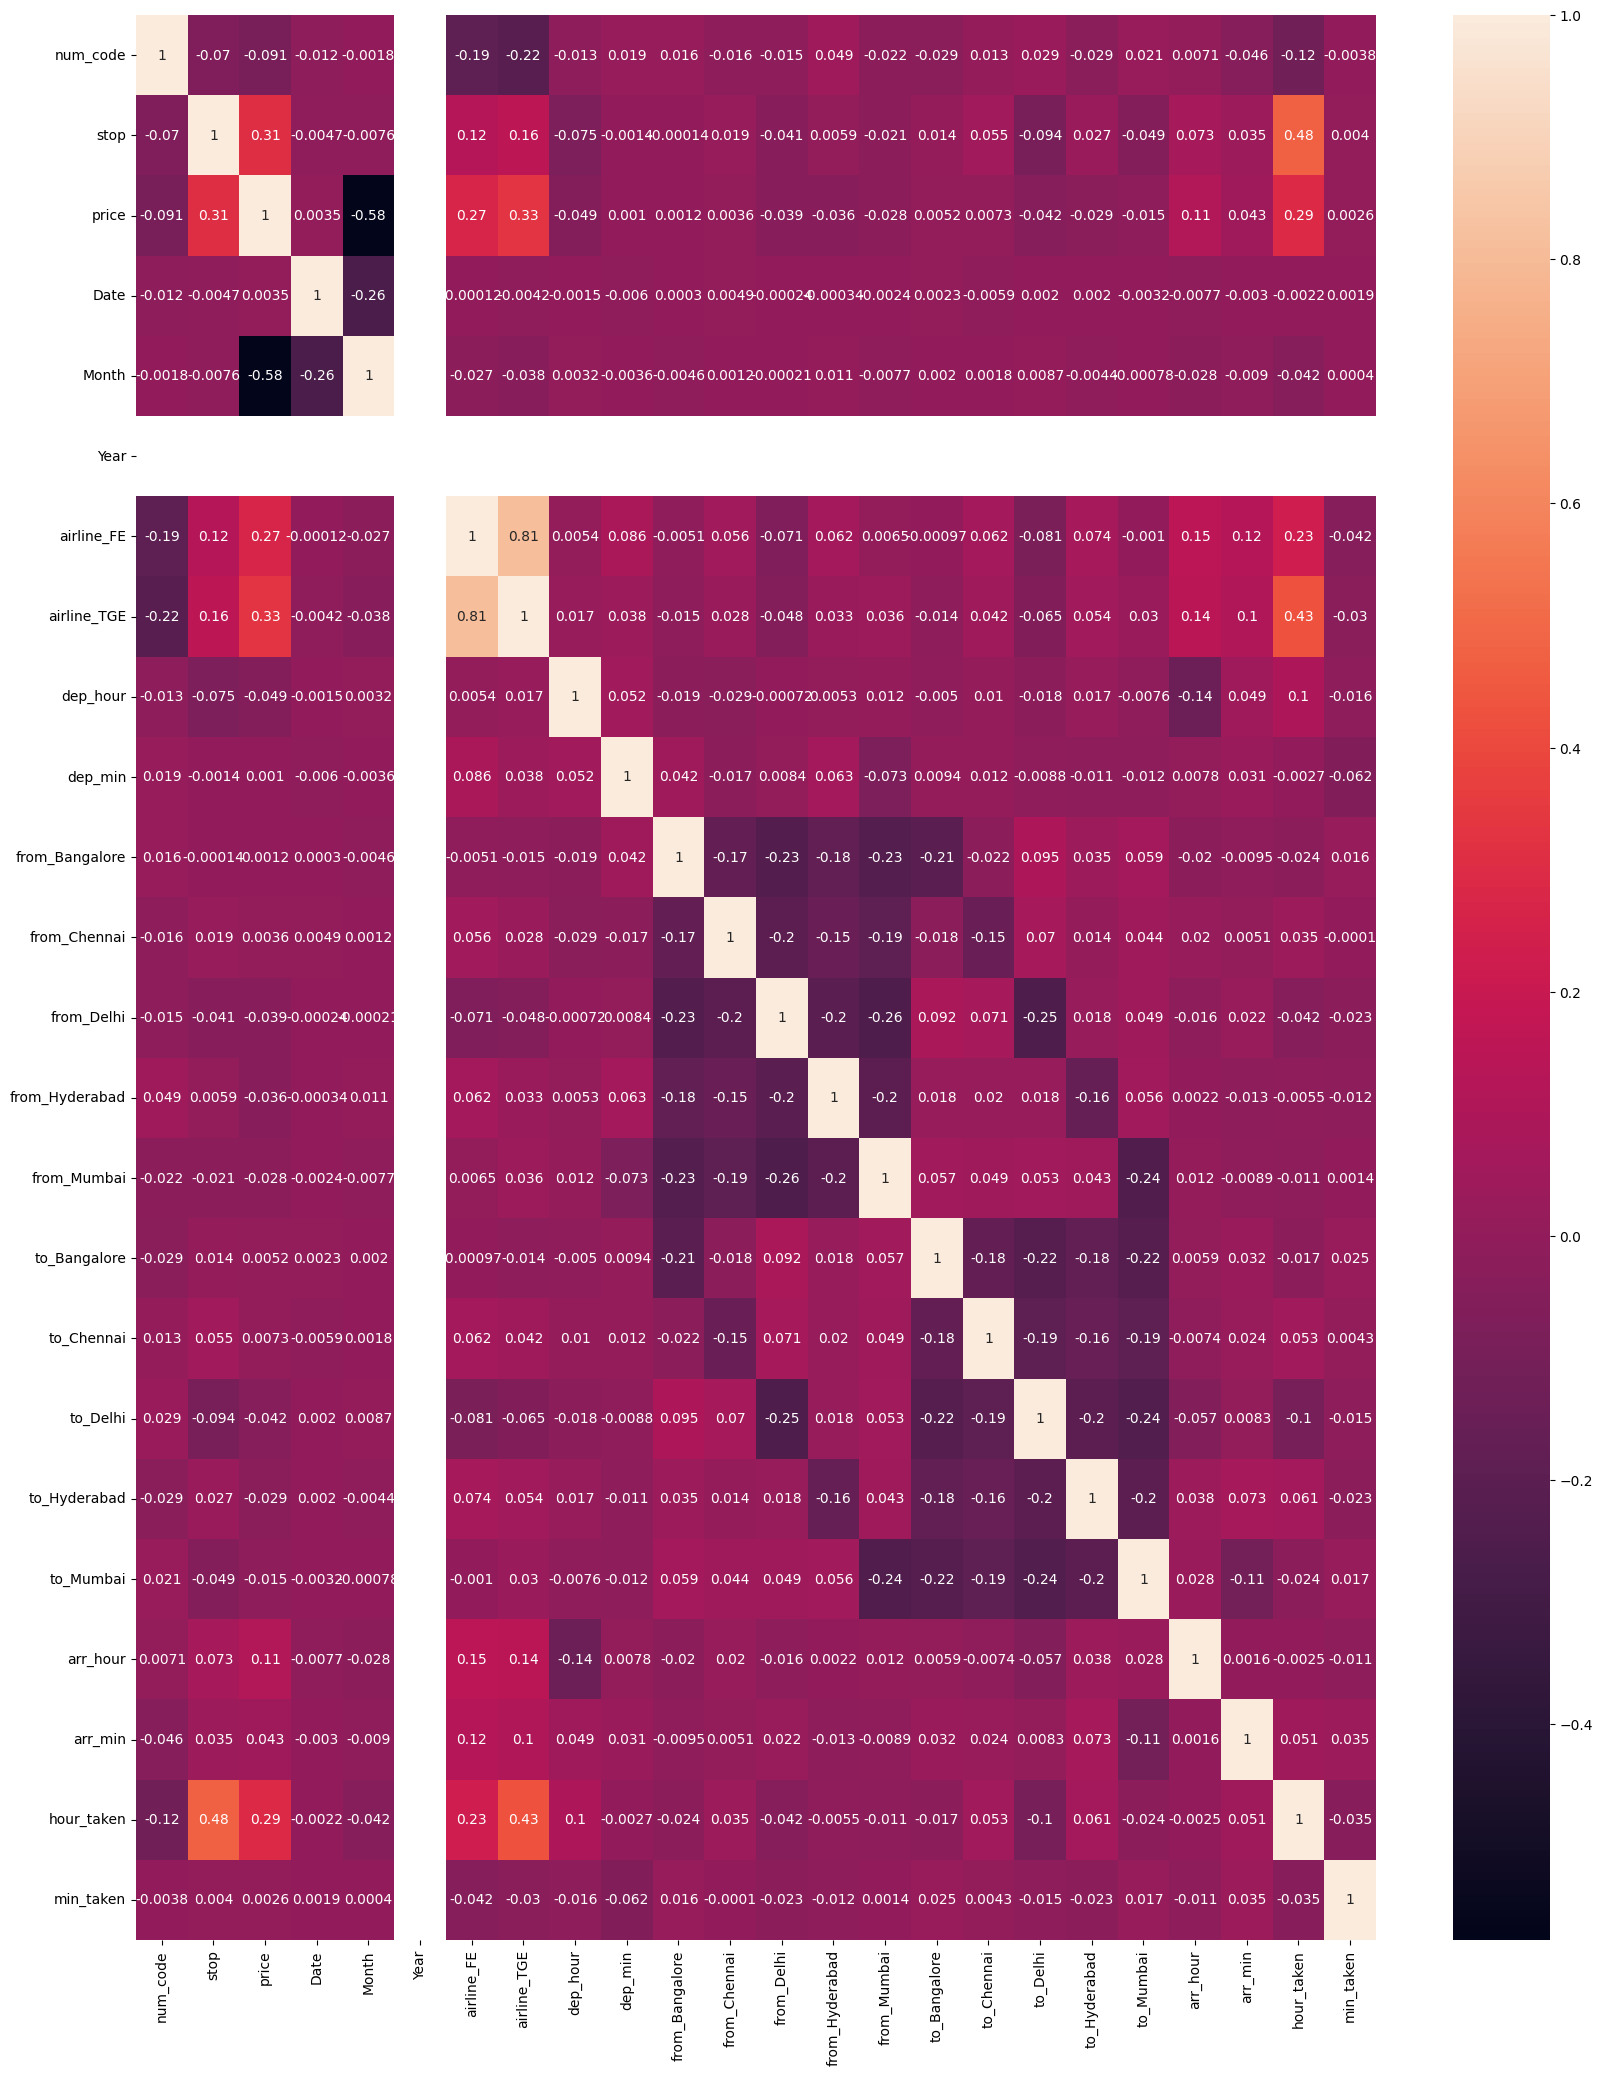

In [ ]:
plt.figure(figsize=(20,25)) # Setting figure size = (20,25) --> 20 inches wide and 25 inches tall.
sns.heatmap(df.corr(),annot=True) # Computing the correlation between the features in the form of heatmap.

**In the heatmap above, why do we see a blank (or white) cell in a heatmap,  for the column Year ?**

---

### **Reason: No Correlation Variance**

The `Year` column has **no variance** — i.e., the same value for every row (always `2022`). In that case:

* **Correlation with any other column = NaN**
* So in a **heatmap**, it appears **blank or white** because correlation can't be computed

---
Correlation is a measure of how **two variables move together**. If one of them **doesn’t move at all** (constant), then:

* Standard deviation = 0
* Correlation = undefined (division by zero)

Hence a blank space in the heatmap.

---
You can choose to drop the column as well if it is not important.